In [1]:
import numpy as np
import prtools as pr
import matplotlib.pyplot as plt

from jupyterthemes import jtplot
jtplot.style (theme="chesterish")

# Exercise 4.1

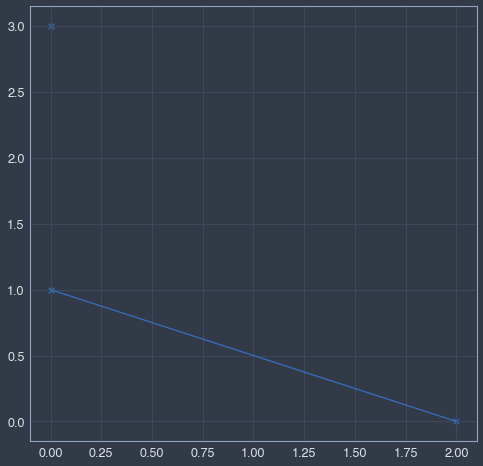

In [16]:
plt.figure(figsize=(8,8))
x = np.array([[0,1], [0,3], [2,0]])
y = np.array([0, 0, 1]) # 0 is class 1 and 1 is class 2
plt.scatter(x[:,0], x[:,1], marker="x")
plt.plot([2,0], [0,1])
plt.show()

a) The classification boundary is the perpendicular bisector of the line segment between (0,1)and (2,0). There are 2 support vectors.

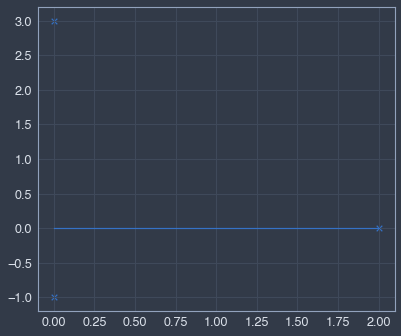

In [17]:
x = np.array([[0,-1], [0,3], [2,0]])
y = np.array([0, 0, 1])
plt.scatter(x[:,0], x[:,1], marker="x")
plt.plot([2,0], [0,0])
plt.show()

b) The classification boundary now becomes the vertical line through (1,0).  All three points become support vectors.

# Exercise 4.2

In [4]:
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import maxabs_scale
from sklearn.preprocessing import normalize

In [7]:
help (pr.svc)

Help on function svc in module prtools.prtools:

svc(task=None, x=None, w=None)
    Support vector classifier
    
           w = svc(A,(K,K_par,C))
    
    Train the support vector classifier on dataset A, using kernel K
    with kernel parameter K_par. The tradeoff between the margin and
    training hinge loss is defined by parameter C.
    
    The following kernels K are defined:
    'linear'    linear kernel (default)
    'poly'      polynomial kernel with degree K_par
    'rbf'       RBF or Gaussian kernel with width K_par
    
    Example:
    a = gendatb()
    w = svc(a,('rbf',4,1))



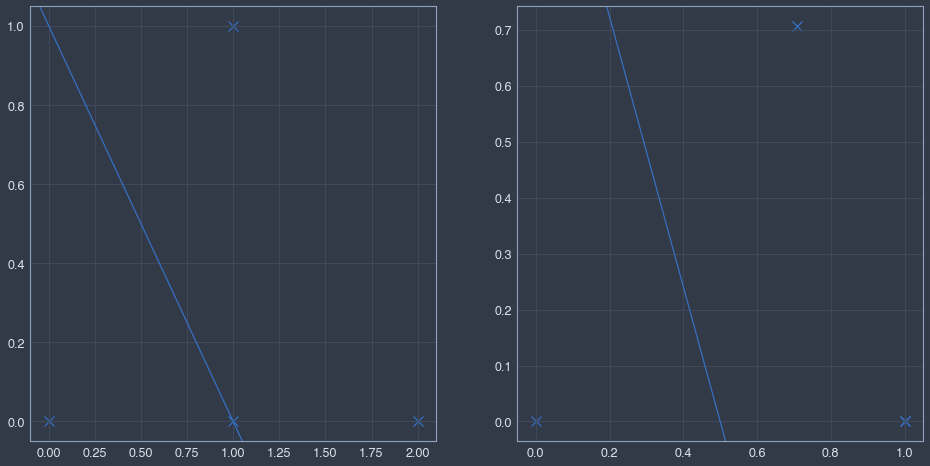

In [6]:
# Consider (0,0) for one class, (1,1) and (2,0) for the other class, 
# and (1,0)as a test point and see 
# how the classification of the last point changes with different scalings of the first feature.
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
x = np.array([[1,1], [2,0], [0,0], [1,0]])
y = np.array([0, 0, 1, 2])
plt.scatter(x[:,0], x[:,1], marker="x", s=100)
train = pr.prdataset(x[:3], y[:3])
c = pr.svc(train, ("linear", 0, 20))
pr.plotc(c)

plt.subplot(1,2,2)
x_rescale = normalize(x)
plt.scatter(x_rescale[:,0], x_rescale[:,1], marker="x", s=100)
train_re = pr.prdataset(x_rescale[:3], y[:3])
c = pr.svc(train_re, ("linear", 0, 20))
pr.plotc(c)

plt.show()

It testify the fact that the support vector classifier is sensitive to feature scaling.

# Exercise 4.3
## Difference between LDA and SVM

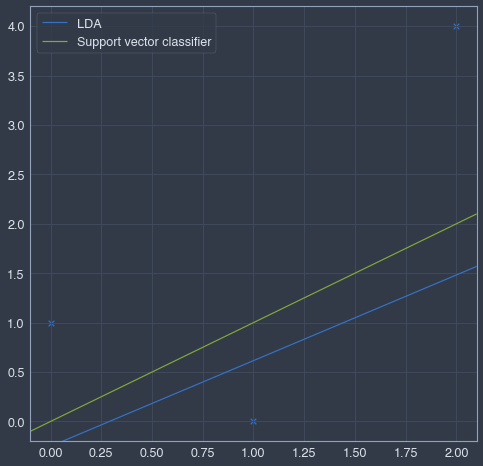

In [16]:
plt.figure(figsize=(8,8))
x = np.array([[0,1],[2,4],[1,0]])
y = np.array([0,0,1])
data = pr.prdataset(x,y)
w1 = pr.ldc(data,1)
w2 = pr.svc(data,("linear",0, 20))
plt.scatter(x[:,0], x[:,1],marker = "x")
pr.plotc(w1)
pr.plotc(w2)
plt.legend()
plt.show()

#### The two solutions will be the same when the number of support vectors is three in the 2D case. LDA will always have three "support vectors" in this 2D setting.

# See Exercise 3.17

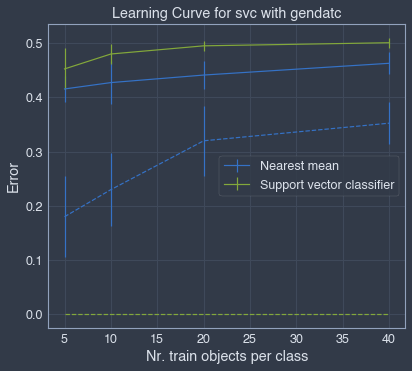

In [39]:
data = pr.gendatc(n=(1000,1000),dim=2, mu=0.0)
feature = +data 
label = pr.genlab(n=(1000,1000),lab=[-1,1])
noiseFeature = np.hstack((feature,np.random.rand(2000,60)))
noiseData = pr.prdataset(noiseFeature, label)
e_nmc = pr.cleval(noiseData, pr.nmc(), trainsize=[5, 10, 20, 40], nrreps=10) # default
u = pr.svc([],("linear",0,20))
e_svc = pr.cleval(noiseData, u,trainsize=[5, 10, 20, 40], nrreps=10)
plt.title("Learning Curve for nmc with gendatc")
plt.title("Learning Curve for svc with gendatc")
plt.legend()

In [34]:
help (pr.cleval)

Help on function cleval in module prtools.prtools:

cleval(a, u, trainsize=[2, 3, 5, 10, 20, 30], nrreps=3, testfunc=<function testc at 0x7fb7bcd8a670>)
    Learning curve
    
           E = cleval(A,U,TRAINSIZE,NRREPS)
    
    Estimate the classification error E of (untrained) mapping U on
    dataset A for varying training set sizes. Default is
    trainsize=[2,3,5,10,20,30].
    To get reliable estimates, the train-test split is repeated NRREPS=3
    times.
    
    Example:
    a = gendatb([100,100])
    u = nmc()
    e = cleval(a,u,nrreps=10)



# Exercise 4.7
#### svc(a,(kernel type,par,C))

#### a) 

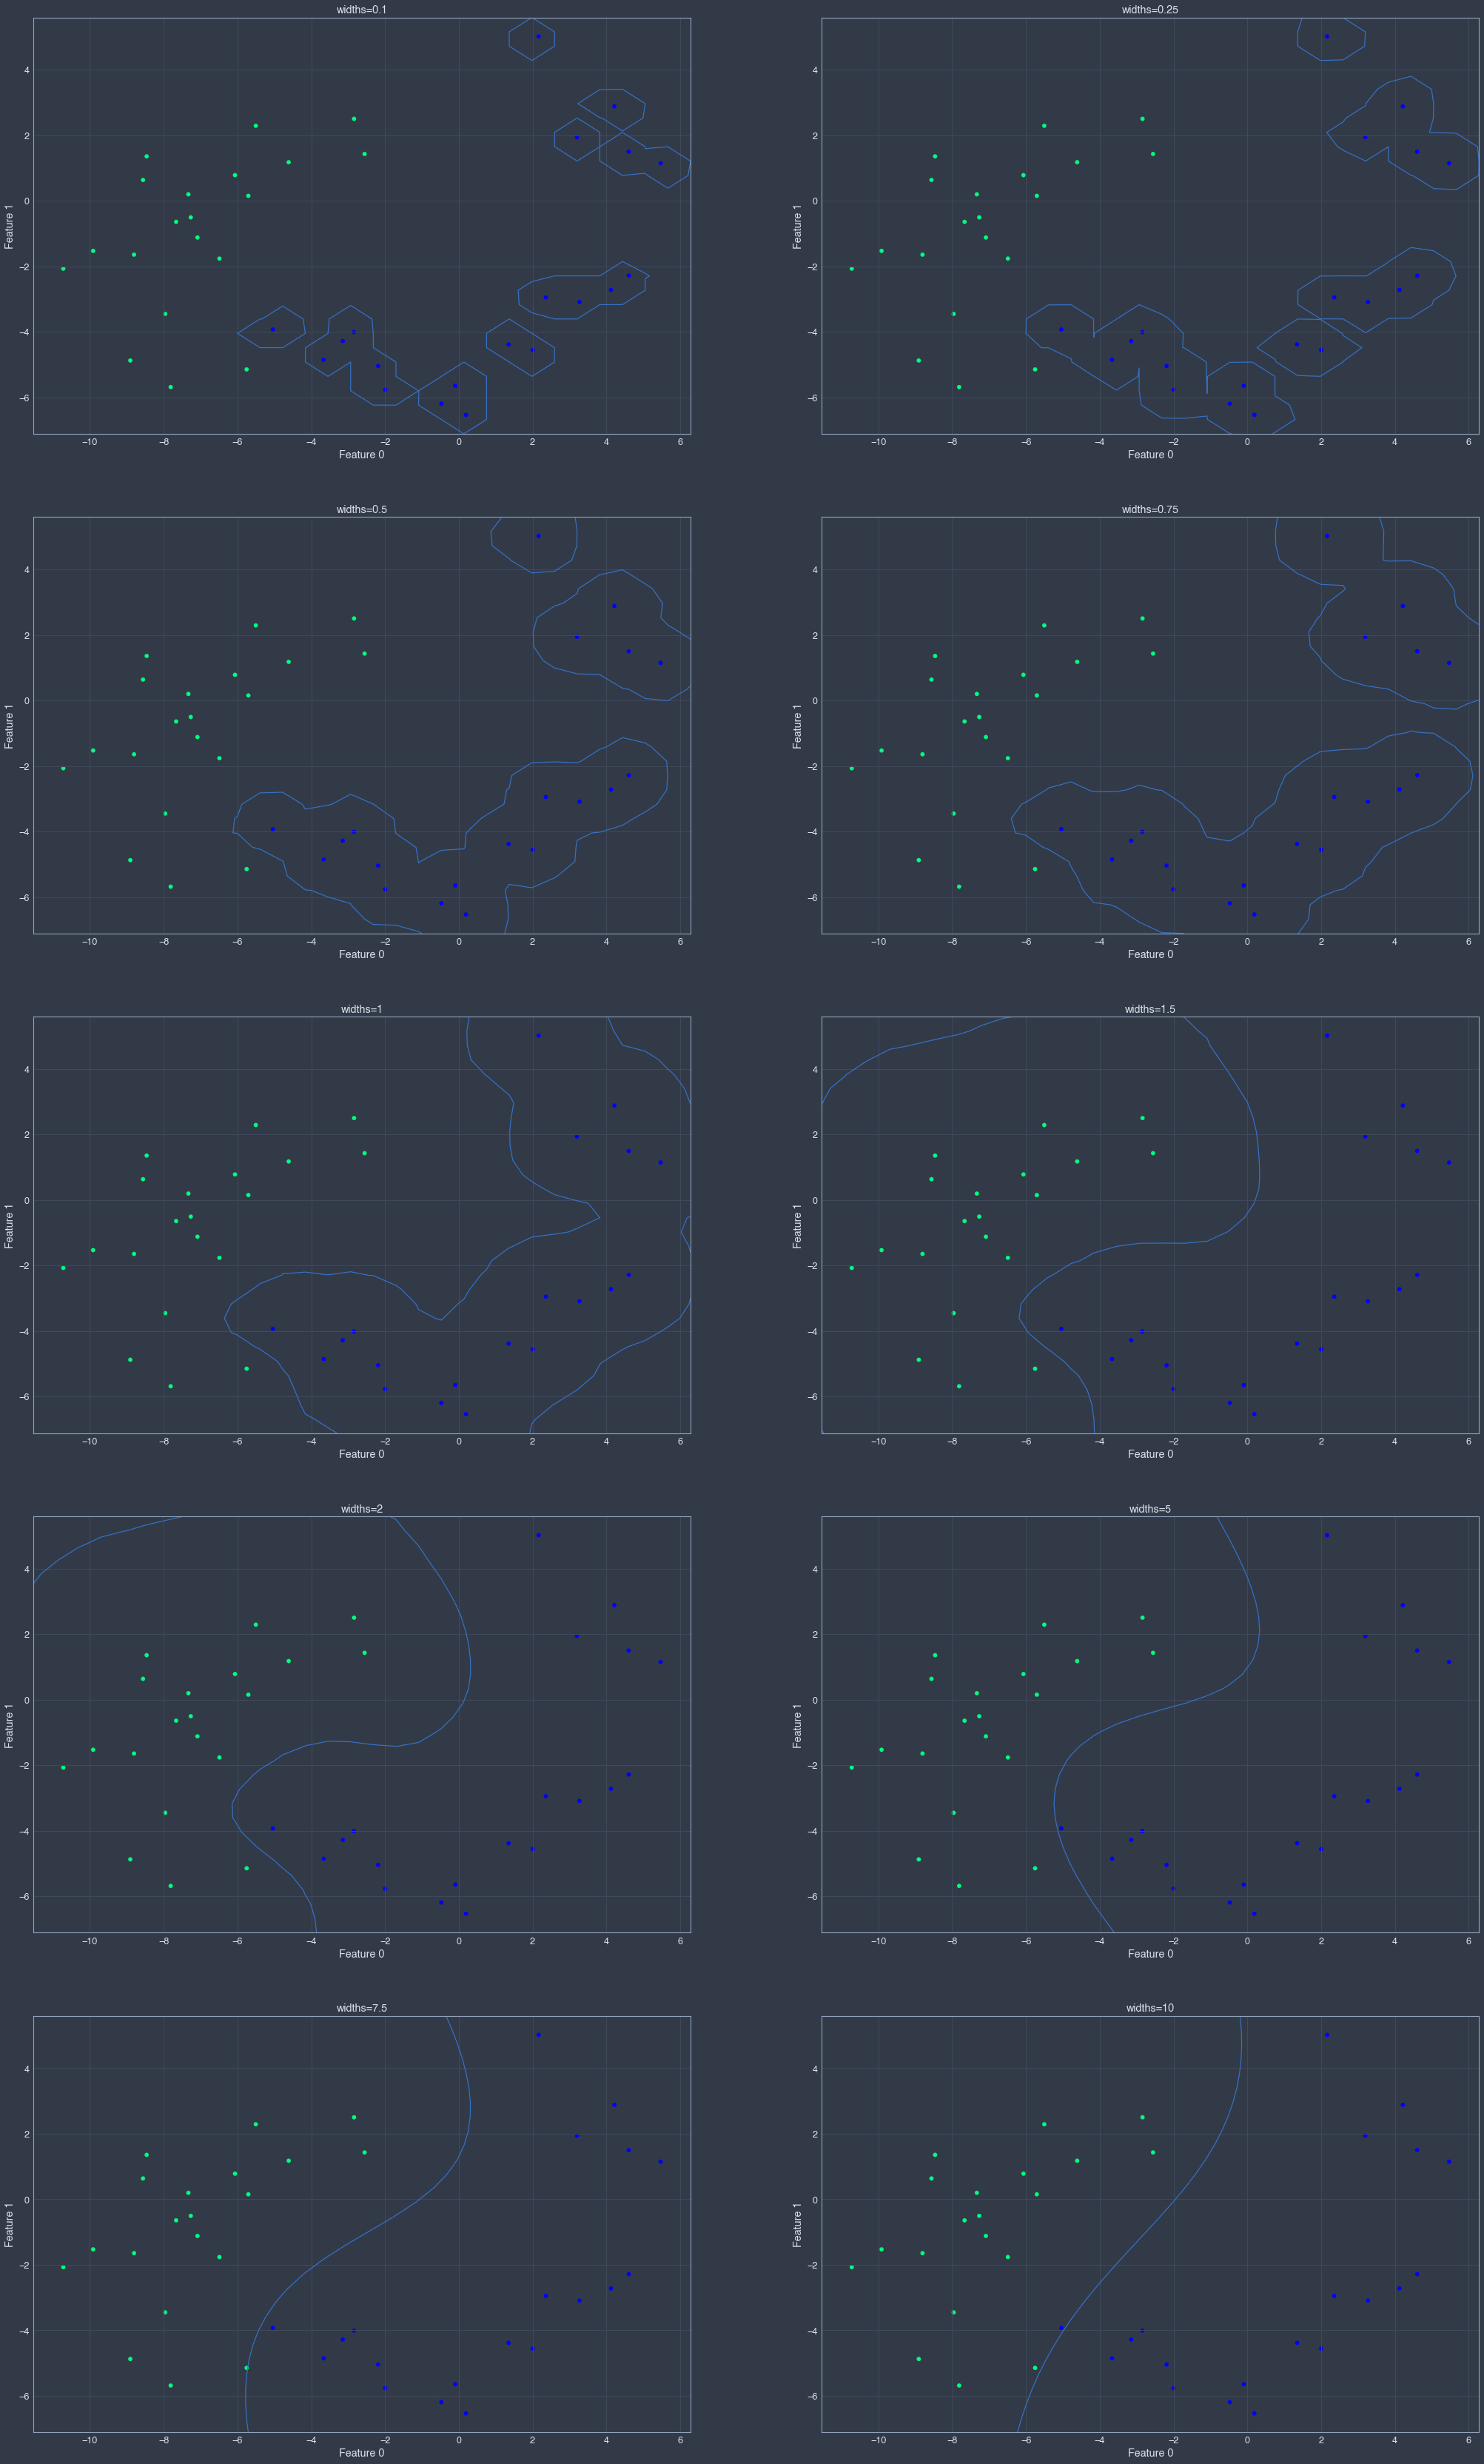

In [23]:
a=pr.gendatb(n=[20,20], s=1) # a large independent banana test set
plt.figure(figsize=(35,60))
widths = [0.1, 0.25, 0.5, 0.75, 1, 1.5, 2, 5, 7.5, 10]
for i in range(len(widths)):
    svc = pr.svc(a, ("rbf", widths[i], 10))
    plt.subplot(5,2,i+1)
    pr.scatterd(a)
    pr.plotc(svc)
    plt.title("widths="+str(widths[i]))
plt.show()

When the width increases from 0.1 to 10, the decision boundary becomes smoother and the performance is deteriorating.

# Exercise 4.8
#### Optimize the hyperparameter of an RBF SVC

In [24]:
help (pr.prcrossval)

Help on function prcrossval in module prtools.prtools:

prcrossval(a, u, k=10, nrrep=1, testfunc=<function testc at 0x7fb7bcd8a670>)
    Performance estimation using crossvalidation
    
           E = prcrossval(A,U,K,NRREP)
    
    Estimate the classification error E of (untrained) mapping U on
    dataset A by using K-fold (stratified) crossvalidation. If required,
    the crossvalidation can be repeated NRREP times, to get a better
    estimate.
    
    Example:
    a = gendatb()
    u = nmc()
    e = prcrossval(a,u,k=10)



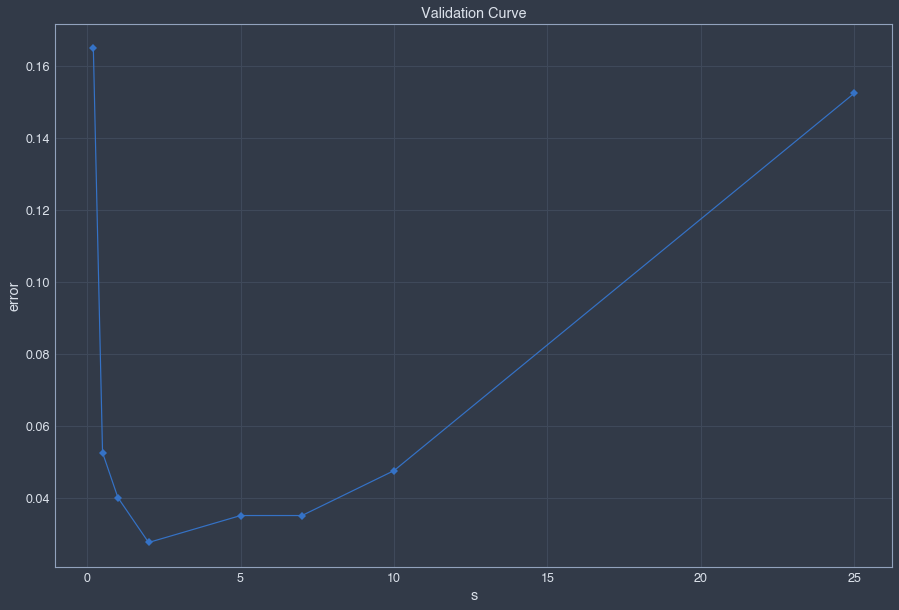

In [30]:
a = pr.gendatb(n=[200,200], s=1)
s = np.array([0.2, 0.5, 1.0, 2.0, 5.0, 7.0, 10.0, 25.0])
e = np.zeros(len(s))

for i in range(len(s)):
    e[i] = pr.prcrossval(a, pr.svc([],("rbf", s[i], 10)), k=10).mean()

plt.figure(figsize=(15,10))
plt.plot(s, e, "-D")
plt.title("Validation Curve")
plt.xlabel("s")
plt.ylabel("error")
plt.show()

Depending on the exact dataset, often s around 2 is optimal where the error is minimal.